In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
np.random.seed(42)

%matplotlib inline

Had to do
```
library(foreign)
iqdata <- read.dta("./ARM_Data/child.iq/child.iq.dta")
write.csv(iqdata, "./ARM_Data/child.id/child.iq.csv", row.names = FALSE)
```
in R otherwise the dta file is of incompatible version with pandas

### TODO:
* add interpretation for charts and fit summaries
* add data and problem definition

In [2]:
iqdata = pd.read_csv("./ARM_Data/child.iq/child.iq.csv")

In [3]:
iqdata.describe()

,ppvt,educ_cat,momage
count,400.000000,400.000000,400.000000
mean,86.932500,2.112500,22.790000
std,20.440094,0.813325,2.689607
min,20.000000,1.000000,17.000000
25%,74.000000,2.000000,21.000000
50%,90.000000,2.000000,23.000000
75%,102.000000,3.000000,25.000000
max,144.000000,4.000000,29.000000


In [4]:
iqdata.head()

,ppvt,educ_cat,momage
0,120,2,21
1,89,1,17
2,78,2,19
3,42,1,20
4,115,4,26


* `ppvt` is a child's test score
* `educ_cat` is a categorical variable representing mother's education
* `momage` is an age of a mother

Let's check the pairwise relationships

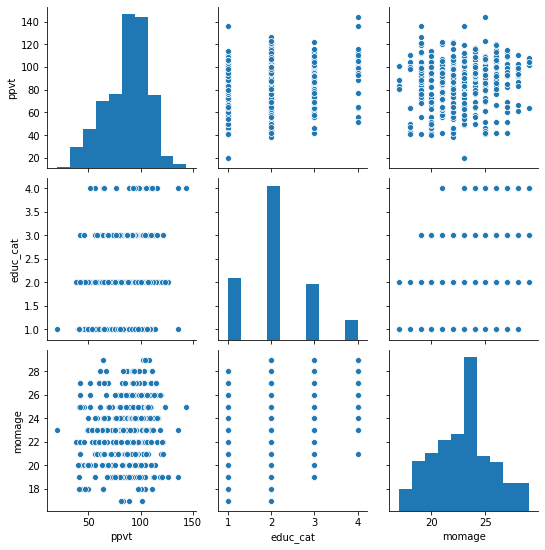

In [5]:
sns.pairplot(data=iqdata)

In [6]:
pt_to_age_model = sm.OLS(exog=sm.add_constant(iqdata[['momage']]), endog=iqdata['ppvt']).fit()

In [7]:
pt_to_age_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ppvt   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4.926
Date:                Wed, 04 Mar 2020   Prob (F-statistic):             0.0270
Time:                        11:43:53   Log-Likelihood:                -1771.6
No. Observations:                 400   AIC:                             3547.
Df Residuals:                     398   BIC:                             3555.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.7827      8.688      7.802      0.000      50.702      84.863
momage         0.8403      0.379      2.219      0.027       0.096       1.585
==============================================================================
Omnibus:                       13.809   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.718
Skew:                          -0.468   Prob(JB):                     0.000637
Kurtosis:                       2.907   Cond. No.                         196.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

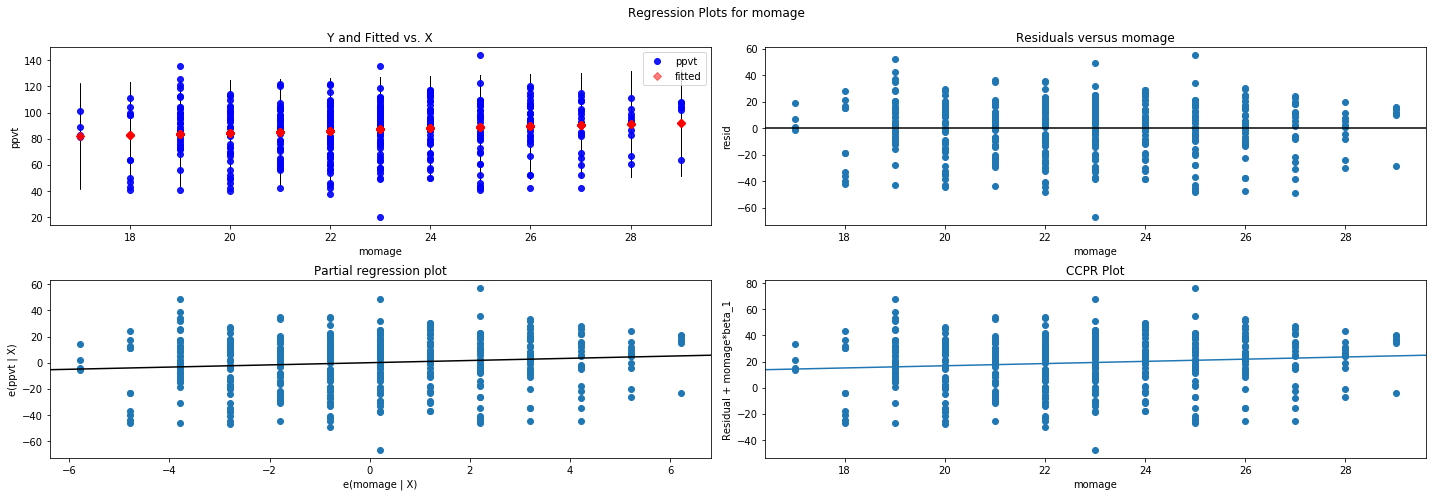

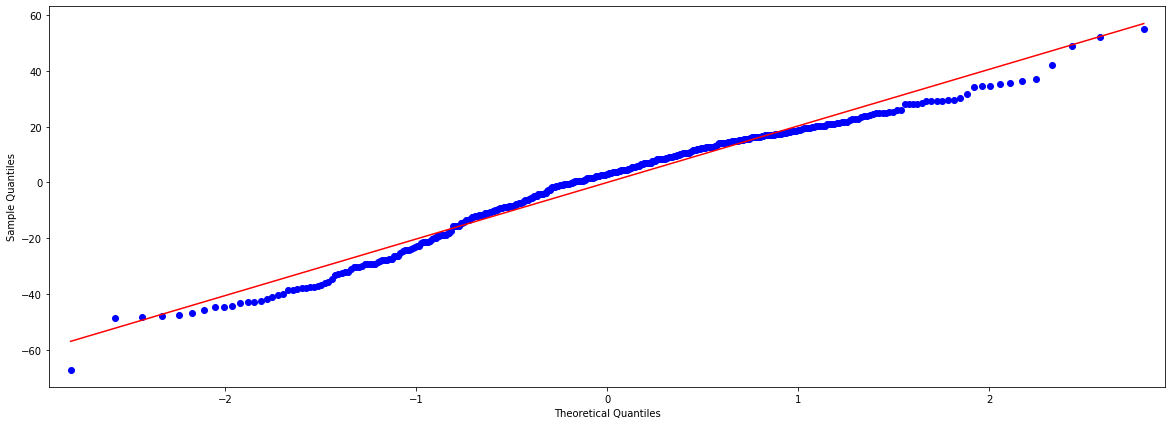

In [8]:
with plt.rc_context():
    plt.rc("figure", figsize=(20,7))
    sm.graphics.plot_regress_exog(pt_to_age_model, "momage");
    sm.qqplot(pt_to_age_model.resid, line='r');

`educ_cat` is clearly a categorical variable, we can check if the data differs between categories

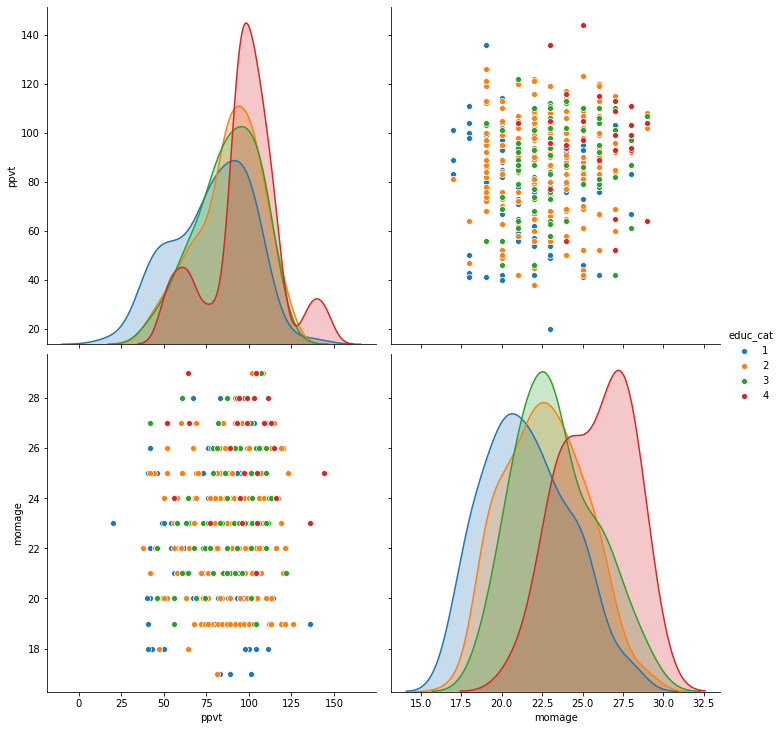

In [9]:
sns.pairplot(data=iqdata, hue="educ_cat", height=5)

From the looks of the relationships is seems like the values are pretty comparable and ordered (the higher `educ_cat` gets the higher the points and the age is) so we can make an attempt to include both variables into the model even despite their correlation.

In [10]:
all_var_model = sm.OLS(exog=sm.add_constant(iqdata[['momage', 'educ_cat']]), endog=iqdata['ppvt']).fit()
all_var_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ppvt   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     8.939
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           0.000159
Time:                        11:43:55   Log-Likelihood:                -1765.3
No. Observations:                 400   AIC:                             3537.
Df Residuals:                     397   BIC:                             3549.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.1554      8.571      8.069      0.000      52.306      86.005
momage         0.3433      0.398      0.862      0.389      -0.439       1.126
educ_cat       4.7114      1.317      3.579      0.000       2.123       7.300
==============================================================================
Omnibus:                       12.949   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.562
Skew:                          -0.435   Prob(JB):                      0.00113
Kurtosis:                       2.761   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

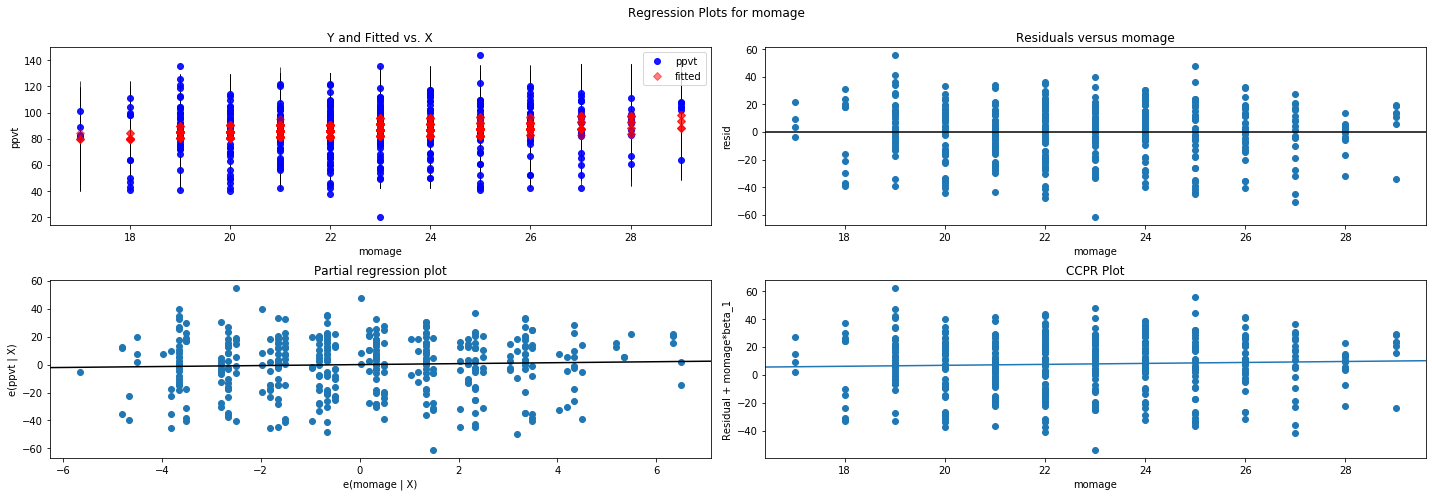

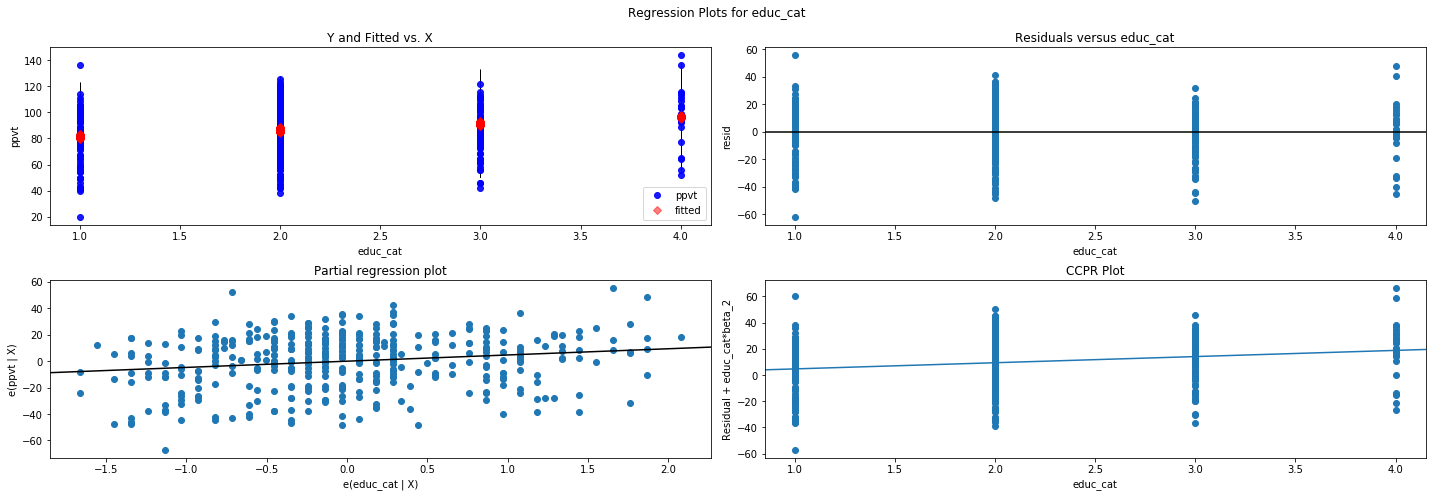

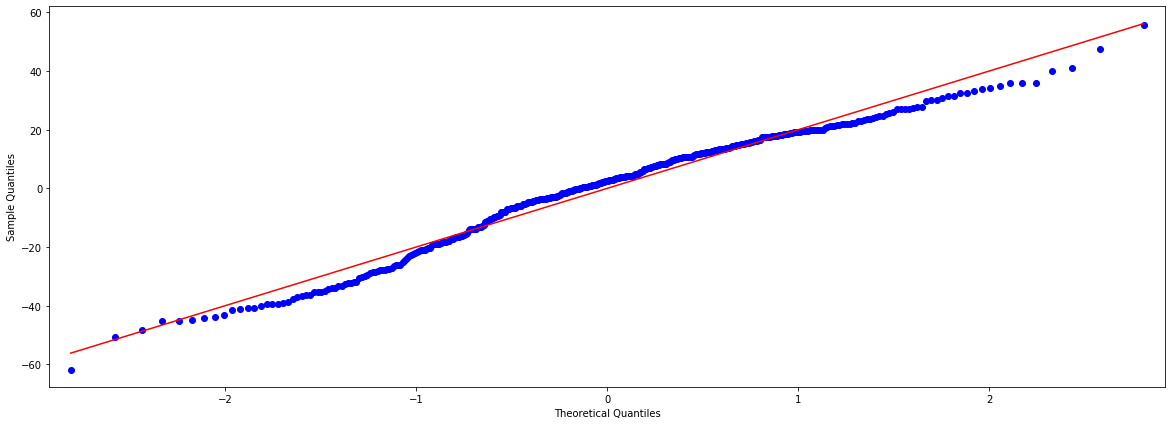

In [11]:
with plt.rc_context():
    plt.rc("figure", figsize=(20,7))
    sm.graphics.plot_regress_exog(all_var_model, "momage");
    sm.graphics.plot_regress_exog(all_var_model, "educ_cat");
    sm.qqplot(all_var_model.resid, line='r');

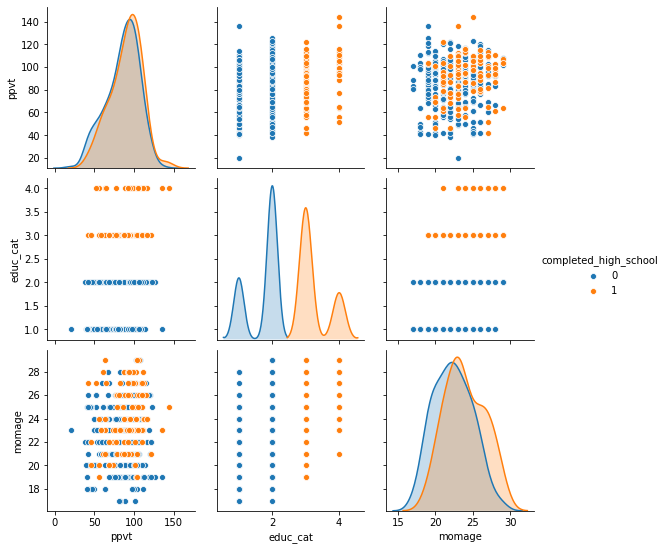

In [12]:
iqdata_ex = iqdata.assign(
    completed_high_school = lambda x: (x.educ_cat >= 3).astype('int') # not sure here, couldn't find an interpretation of the values in the book
)

sns.pairplot(iqdata_ex, hue="completed_high_school")

In [13]:
all_var_model_with_val = sm.OLS(exog=sm.add_constant(iqdata.loc[:200,['momage', 'educ_cat']]), endog=iqdata.loc[:200,'ppvt']).fit()
all_var_model_with_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ppvt   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     6.731
Date:                Wed, 04 Mar 2020   Prob (F-statistic):            0.00148
Time:                        11:43:59   Log-Likelihood:                -881.02
No. Observations:                 201   AIC:                             1768.
Df Residuals:                     198   BIC:                             1778.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.6200     11.782      5.400      0.000      40.386      86.854
momage         0.4473      0.550      0.813      0.417      -0.638       1.532
educ_cat       5.4493      1.796      3.035      0.003       1.908       8.991
==============================================================================
Omnibus:                        4.597   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                4.618
Skew:                          -0.340   Prob(JB):                       0.0994
Kurtosis:                       2.700   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

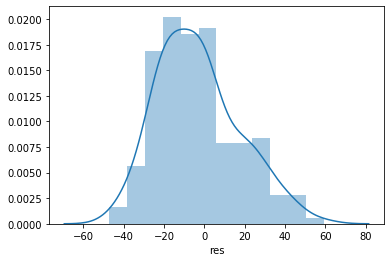

In [14]:
test_set = iqdata.loc[200:].assign(
    pred=lambda x: all_var_model_with_val.predict(sm.add_constant(x[['momage', 'educ_cat']])),
    res=lambda x: x.pred-x.ppvt
)
sns.distplot(test_set.res)

Just out of curiosity let's check if the response variable follows the same distribution between train and test sets

In [15]:
sets_comp = iqdata[['ppvt']].assign(is_test=False)
sets_comp.loc[200:, 'is_test']=True

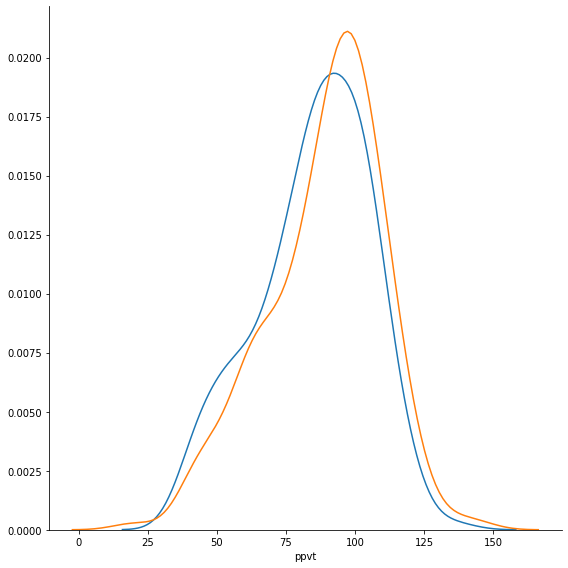

In [16]:
g = sns.FacetGrid(sets_comp, hue="is_test", height=8)
g = g.map(sns.kdeplot, "ppvt")

Visually looks similar, yet statistical comparison is better to be made.

Trying from [this github issue comment](https://github.com/mwaskom/seaborn/issues/861)

In [17]:
def distplot_fig(data, x, hue=None, row=None, col=None, legend=True, hist=False, height=2, **kwargs):
    """A figure-level distribution plot with support for hue, col, row arguments."""
    bins = kwargs.pop('bins', None)
    if (bins is None) and hist: 
        # Make sure that the groups have equal-sized bins
        bins = np.histogram_bin_edges(data[x].dropna())
    g = sns.FacetGrid(data, hue=hue, row=row, col=col, height=height)
    g.map(sns.distplot, x, bins=bins, hist=hist, **kwargs)
    if legend and (hue is not None) and (hue not in [x, row, col]):
        g.add_legend(title=hue) 
    return g   

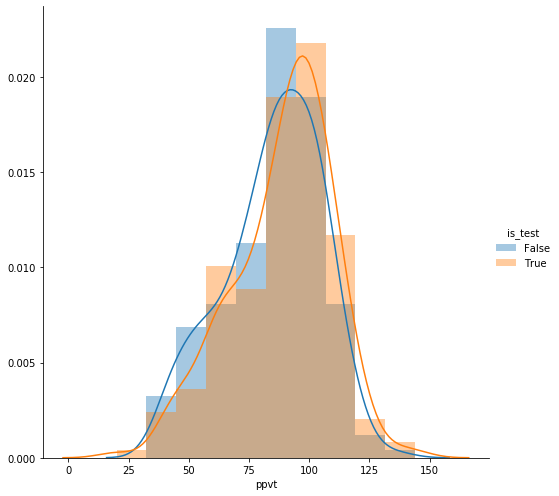

In [18]:
g = distplot_fig(sets_comp, x="ppvt", hue="is_test", hist=True, height=7)